## UFC Rankings Data Analysis

Data Source URL: https://www.kaggle.com/martj42/ufc-rankings

### Insert Neccesary Modules

In [130]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import math
import os

import matplotlib.pypt as plt
import matplotlib.dates as mdates

### Import data in CSV format and convert to pandas dataframe

In [222]:
df = pd.read_csv('UFC_rankings_history.csv')
df = pd.DataFrame(df)
df.head()

,date,weightclass,fighter,rank
0,2013-02-04,Pound-for-Pound,Anderson Silva,1
1,2013-02-04,Pound-for-Pound,Jon Jones,2
2,2013-02-04,Pound-for-Pound,Georges St-Pierre,3
3,2013-02-04,Pound-for-Pound,José Aldo,4
4,2013-02-04,Pound-for-Pound,Benson Henderson,5


### Convert date column to pandas datetime

In [13]:
df['date'] = pd.to_datetime(df['date'])

### Remove any null values from df

In [14]:
df = df.dropna()

### Display data type info for column variables

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65079 entries, 0 to 65149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         65079 non-null  datetime64[ns]
 1   weightclass  65079 non-null  object        
 2   fighter      65079 non-null  object        
 3   rank         65079 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 2.5+ MB


### Who spent the most weeks in the rankings?

In [178]:
longest_rankers =(df['fighter'].value_counts()).head(20)

longest_rankers

Amanda Nunes            717
Stipe Miocic            587
Daniel Cormier          575
José Aldo               571
Conor McGregor          563
Max Holloway            508
Dustin Poirier          484
Robert Whittaker        465
Dominick Cruz           455
Jon Jones               454
Chris Weidman           452
Khabib Nurmagomedov     448
Joanna Jedrzejczyk      447
Jessica Andrade         444
TJ Dillashaw            439
Demetrious Johnson      430
Rose Namajunas          428
Germaine de Randamie    426
Tyron Woodley           425
Anthony Pettis          424
Name: fighter, dtype: int64

### Create a heatmap for most time spent in UFC rankings for all fighters in all WCs

(array([0.5]), [Text(0.5, 0, '')])

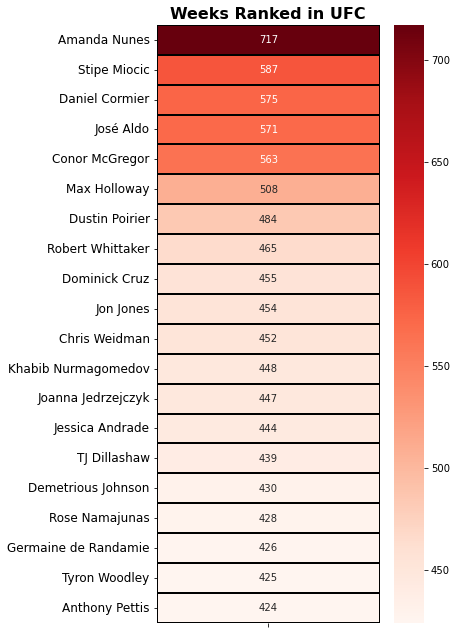

In [214]:
longest_rankers = pd.DataFrame(longest_rankers)
longest_rankers = longest_rankers.rename(columns={'fighter':''}) 
fig, ax = plt.subplots(figsize=(5,11))
    
# For cmap: also like 'Reds', 'Blues', 'Greens', 'PiYG'
sns.heatmap(longest_rankers, annot=True, fmt = 'd', cmap='Reds',
                linewidths = 2 , linecolor = 'k', ax = ax)
plt.yticks(rotation=0, fontsize=12)
plt.title('Weeks Ranked in UFC', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)

### Create unique dates list

In [43]:
date_list = df.date.unique()
print(f'Rankings released by the UFC: {len(date_list)}')

Rankings released by the UFC: 362


### Create unique fighters list

In [44]:
fighter_list = df.fighter.unique()
print(f'Unique fighters ranked by the UFC: {len(fighter_list)}')

Unique fighters ranked by the UFC: 498


### Create unique weightclass list

In [45]:
weightclass_list = df.weightclass.unique()
print(weightclass_list)

['Pound-for-Pound' 'Flyweight' 'Bantamweight' 'Featherweight'
 'Lightweight' 'Welterweight' 'Middleweight' 'Light Heavyweight'
 'Heavyweight' "Women's Bantamweight" "Women's Strawweight"
 "Women's Featherweight" "Women's Flyweight"]


### Most weeks ranked for each weight class

In [89]:
top_wc_fighter_lists = []

for w in weightclass_list:
    mask = df['weightclass'] == w
    top_wc_fighter_lists.append(df['fighter'][mask].value_counts().head(10))

i=0
while i < len(top_wc_fighter_lists):
    print('\033[1m'+ weightclass_list[i] +'\033[0m')
    print(top_wc_fighter_lists[i])
    print()
    i = i +1

Pound-for-Pound
Jon Jones             266
Stipe Miocic          237
Amanda Nunes          220
Conor McGregor        218
Demetrious Johnson    215
Max Holloway          215
Daniel Cormier        211
Robert Whittaker      193
José Aldo             183
TJ Dillashaw          173
Name: fighter, dtype: int64

Flyweight
Joseph Benavidez       331
Tim Elliott            305
Jussier Formiga        296
John Moraga            225
Demetrious Johnson     215
Alexandre Pantoja      211
Brandon Moreno         196
Dustin Ortiz           195
Henry Cejudo           185
Deiveson Figueiredo    184
Name: fighter, dtype: int64

Bantamweight
Raphael Assuncao     358
Dominick Cruz        346
Aljamain Sterling    274
TJ Dillashaw         258
Pedro Munhoz         218
Cody Garbrandt       218
Jimmie Rivera        213
Eddie Wineland       206
Rob Font             206
Marlon Moraes        194
Name: fighter, dtype: int64

Featherweight
Max Holloway       293
José Aldo          288
Frankie Edgar      284
Jeremy Step

### Create heatmaps for the rankings of each weightclass

In [100]:
list_max = 0
list_min = 1000

for z in range(len(top_wc_fighter_lists)):
    temp_max = max(top_wc_fighter_lists[z])
    if temp_max > list_max:
        list_max = temp_max
        
    temp_min = min(top_wc_fighter_lists[z])
    if temp_min < list_min:
        list_min = temp_min
        
    temp_df = pd.DataFrame(top_wc_fighter_lists[z])
    temp_df.columns = [weightclass_list[z]]

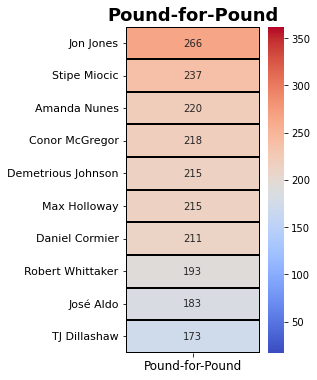

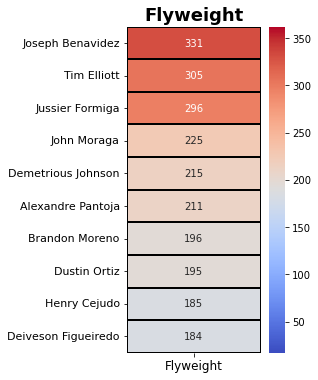

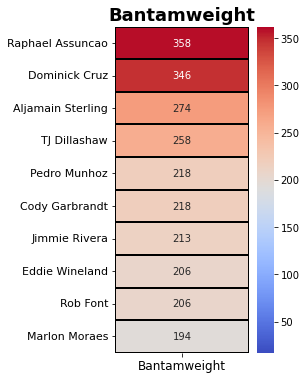

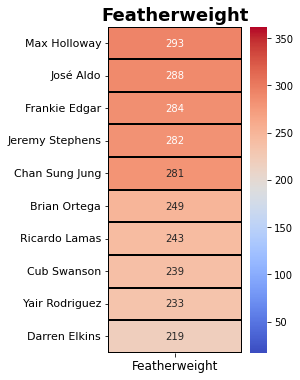

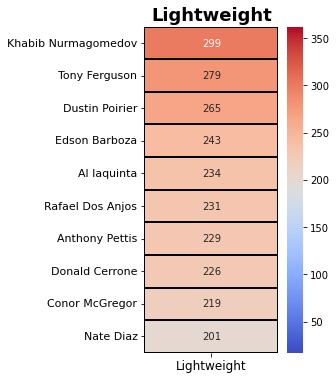

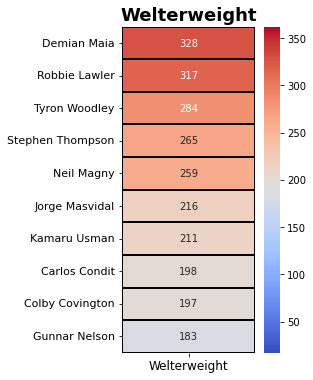

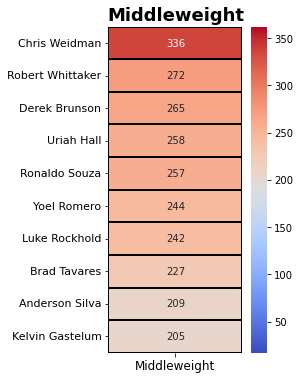

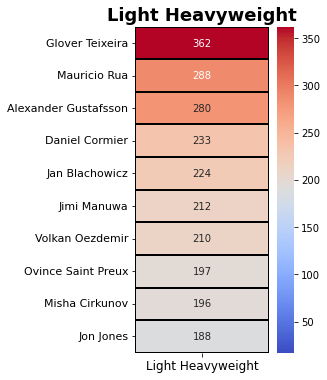

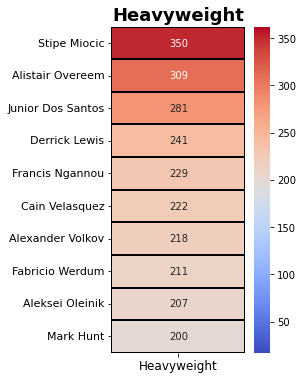

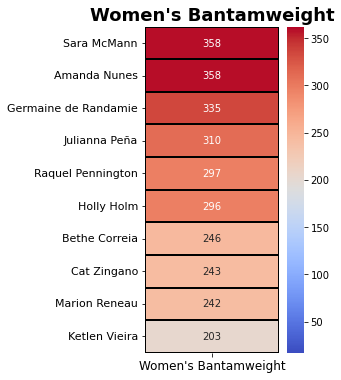

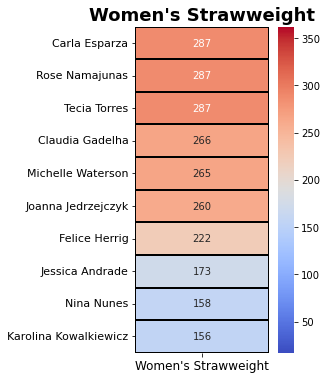

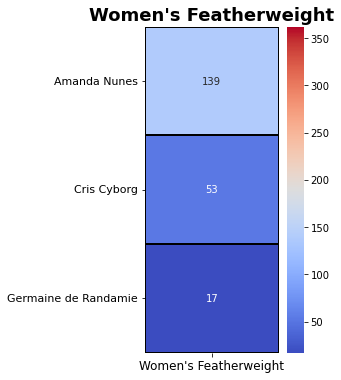

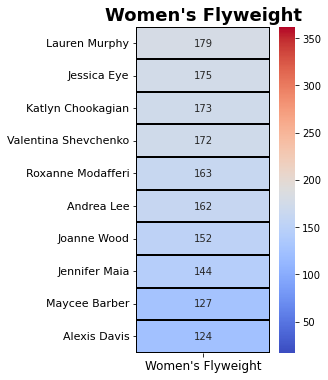

In [134]:
for z in range(len(top_wc_fighter_lists)):
    temp_df = pd.DataFrame(top_wc_fighter_lists[z])
    temp_df.columns = [weightclass_list[z]]
    
   
    fig, ax = plt.subplots(figsize=(3,6))
    
    # For cmap: also like 'Reds', 'Blues', 'Greens', 'PiYG'
    sns.heatmap(temp_df, annot=True, fmt="d", cmap='coolwarm',
                linewidths = 2 , linecolor = 'k', ax = ax, vmin=list_min, vmax=list_max)
    plt.yticks(rotation=0, fontsize=11)
    plt.title(weightclass_list[z], fontsize=18, fontweight='bold')
    plt.xticks(fontsize=12)

### Who spent the most time as a champion in the UFC overall?

In [219]:
champs_df = df[(df['rank']==0)]
champs_df.head()

,date,weightclass,fighter,rank
10,2013-02-04,Flyweight,Demetrious Johnson,0
21,2013-02-04,Bantamweight,Dominick Cruz,0
32,2013-02-04,Featherweight,José Aldo,0
43,2013-02-04,Lightweight,Benson Henderson,0
54,2013-02-04,Welterweight,Georges St-Pierre,0


In [220]:
longest_champs =(champs_df['fighter'].value_counts().head(20))
longest_champs

Amanda Nunes             351
Demetrious Johnson       209
Daniel Cormier           171
Jon Jones                154
Stipe Miocic             143
Valentina Shevchenko     141
Kamaru Usman             133
José Aldo                129
Khabib Nurmagomedov      114
TJ Dillashaw             114
Israel Adesanya          107
Ronda Rousey             104
Rose Namajunas           102
Alexander Volkanovski    100
Max Holloway              99
Chris Weidman             98
Tyron Woodley             97
Joanna Jedrzejczyk        95
Cain Velasquez            94
Henry Cejudo              91
Name: fighter, dtype: int64

(array([0.5]), [Text(0.5, 0, '')])

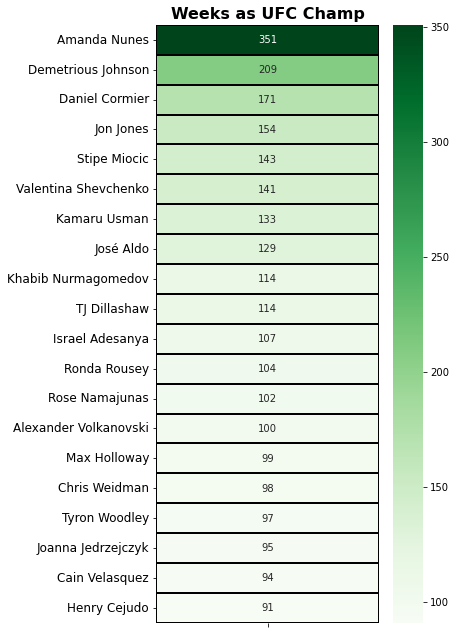

In [221]:
longest_champs = pd.DataFrame(longest_champs)
longest_champs = longest_champs.rename(columns={'fighter':''}) 
fig, ax = plt.subplots(figsize=(5,11))
    
# For cmap: also like 'Reds', 'Blues', 'Greens', 'PiYG'
sns.heatmap(longest_champs, annot=True, fmt = 'd', cmap='Greens',
                linewidths = 2 , linecolor = 'k', ax = ax)
plt.yticks(rotation=0, fontsize=12)
plt.title('Weeks as UFC Champ', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)